In [1]:
import os 
import pandas as pd
import dabest

In [2]:
os.chdir('/project/4180000.23/Fleur_GS/fsl_glm/ICA/')

In [3]:
data = pd.read_excel('fsl_glm_results_ICA.xlsx', decimal='.')
data['Group_name']=data['Group_name'].astype(str)


In [4]:
data.head()

,Group_name,ICA1,ICA2,ICA3,ICA4,ICA5,ICA6,ICA7,ICA8,ICA9,ICA10,ICA11,ICA12,ICA13,ICA14,ICA15,ICA16,ICA17,ICA18
0,Fluoxetine,0.245466,0.479381,0.471523,0.624410,0.494156,0.613623,0.985658,0.359029,0.613525,0.532389,0.323775,0.432193,0.226620,0.285666,0.284016,0.760482,0.188477,0.202619
1,Fluoxetine,0.272578,0.387051,0.450334,0.587791,0.380141,0.531748,0.939952,0.405721,0.683404,0.540416,0.351983,0.361446,0.228180,0.371384,0.301610,0.651813,0.240448,0.282855
2,Fluoxetine,0.399637,0.474235,0.405575,0.535469,0.319955,0.427114,0.890542,0.429996,0.765717,0.514785,0.293963,0.490861,0.227571,0.321719,0.416291,1.275005,0.242604,0.362433
3,Fluoxetine,0.204150,0.165643,0.151543,0.171582,0.210252,0.152182,0.448106,0.150481,0.275320,0.174853,0.351937,0.318765,0.182545,0.143100,0.199112,0.952777,0.198493,0.144495
4,Fluoxetine,0.277785,0.311896,0.256096,0.383812,0.294716,0.374593,0.398476,0.188778,0.592517,0.450273,0.470697,0.452055,0.362984,0.202989,0.304746,0.553153,0.270016,0.361831


/project/4180000.27/conda_envs/python3_9/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/project/4180000.27/conda_envs/python3_9/lib/python3.9/site-packages/dabest/plot_tools.py:1232: UserWarning: 10.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/project/4180000.27/conda_envs/python3_9/lib/python3.9/site-packages/dabest/_effsize_objects.py:292: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(


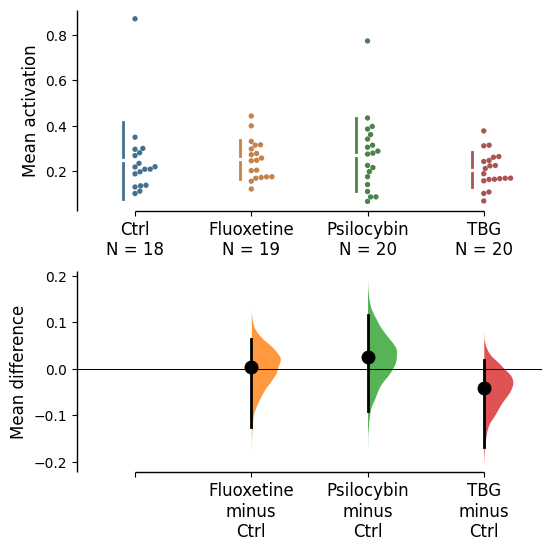

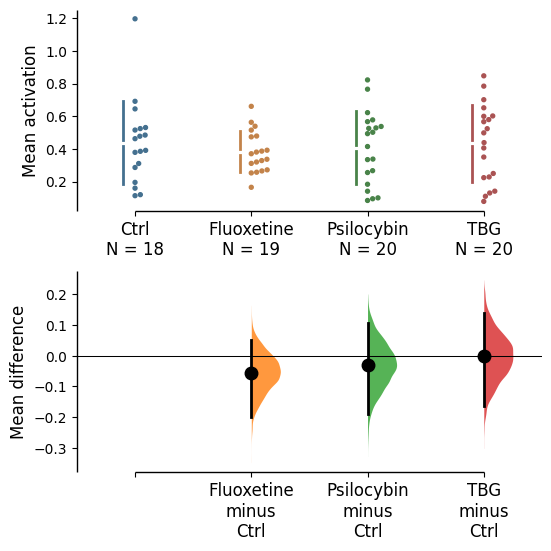

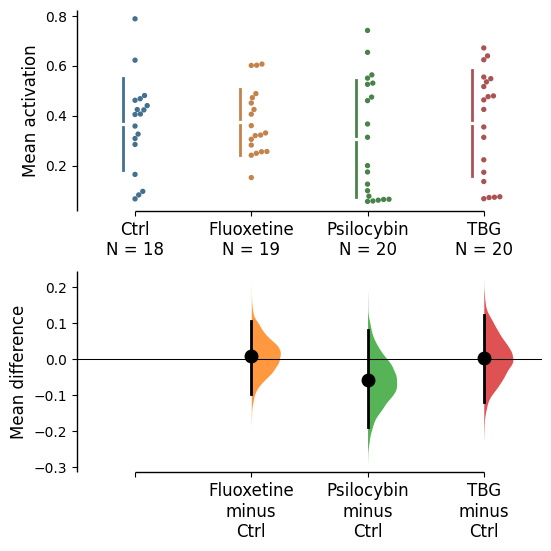

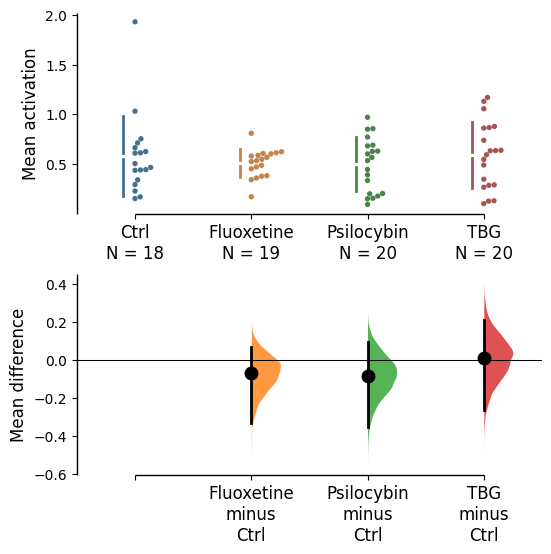

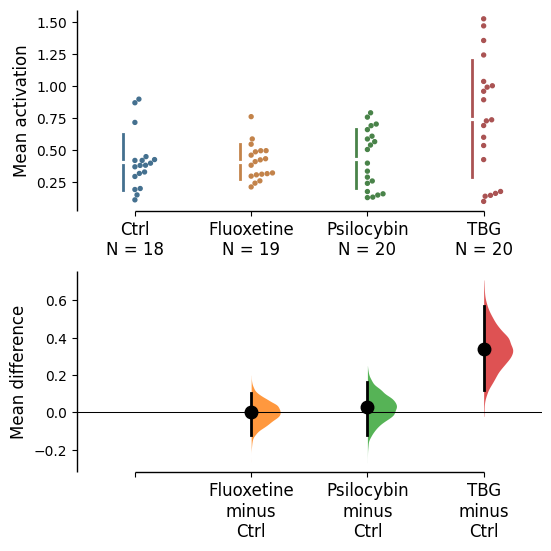

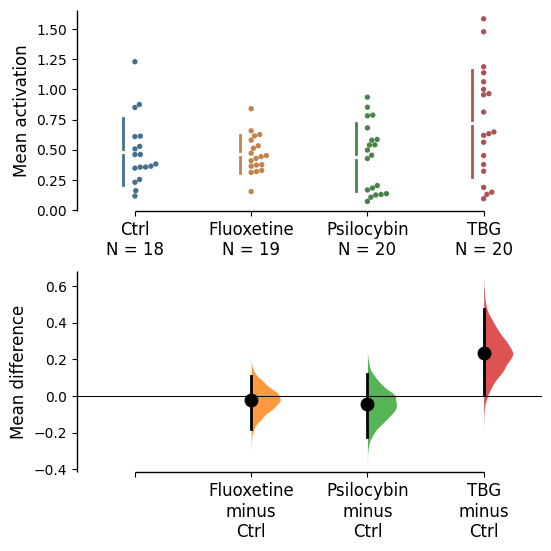

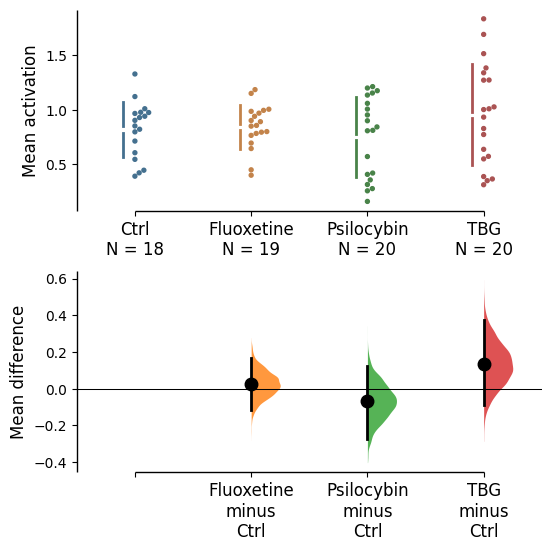

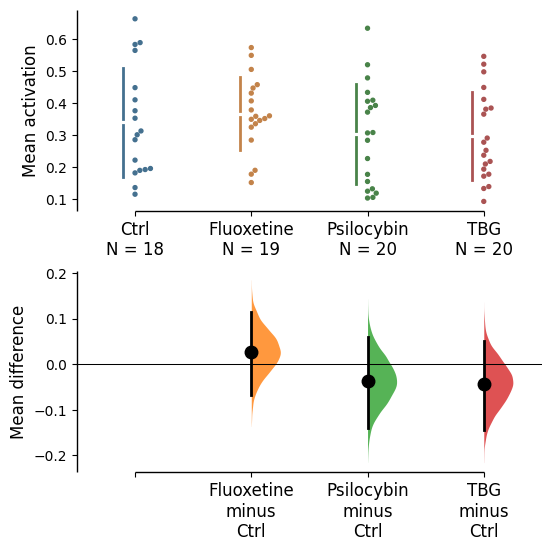

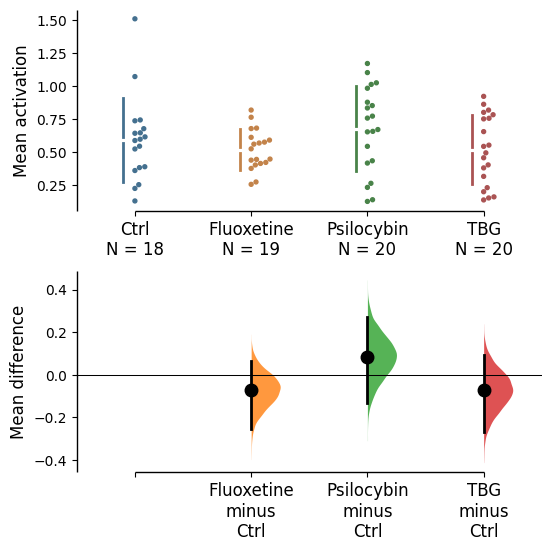

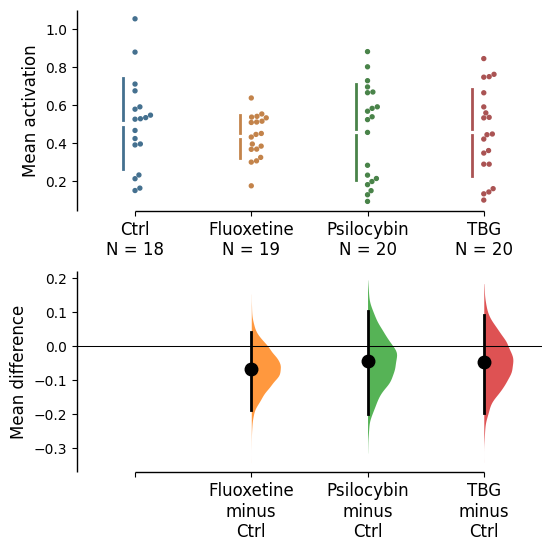

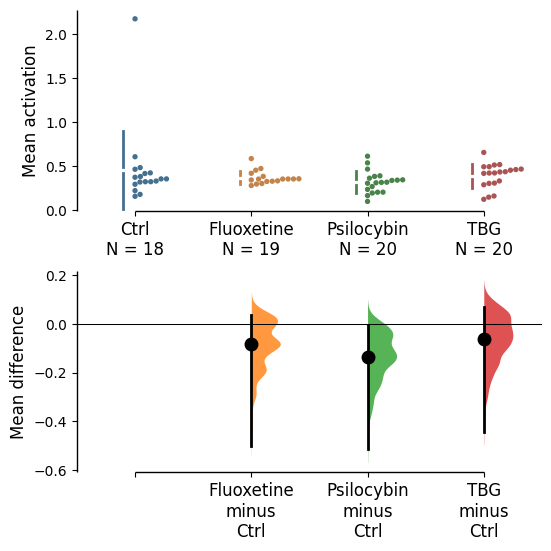

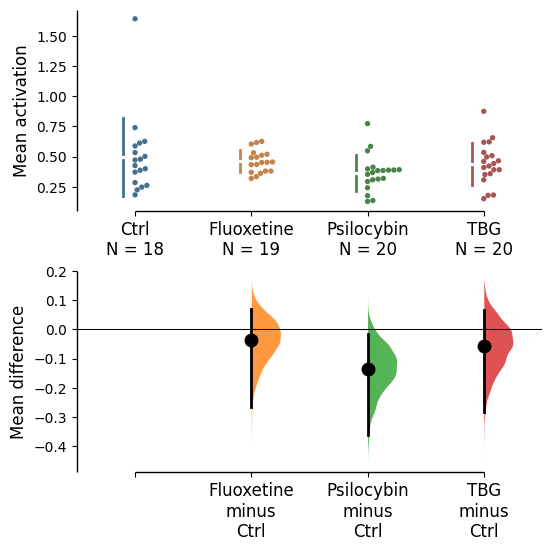

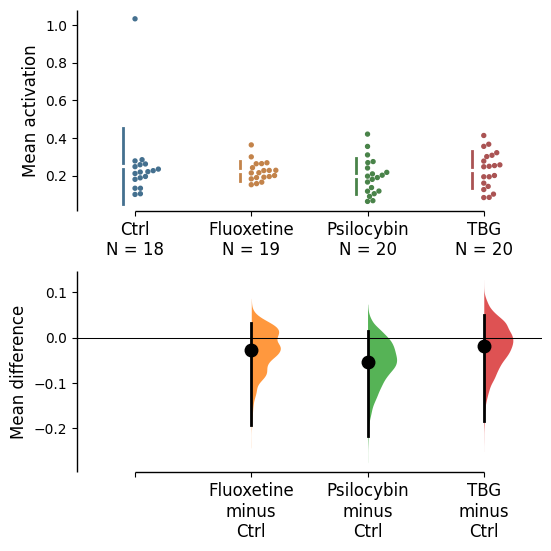

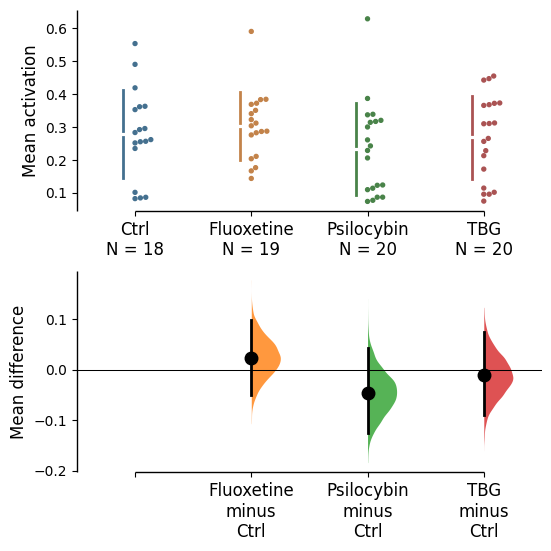

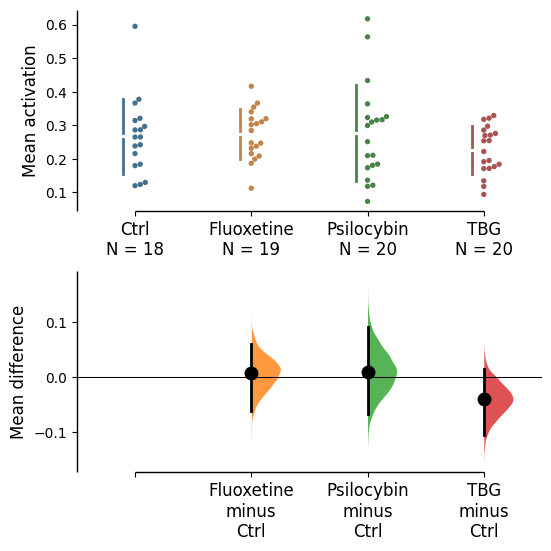

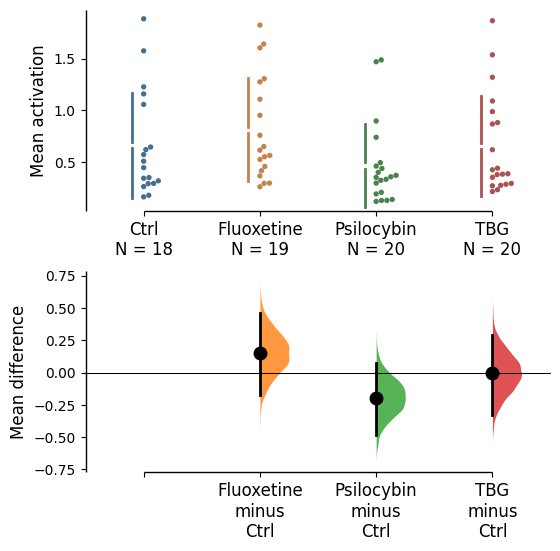

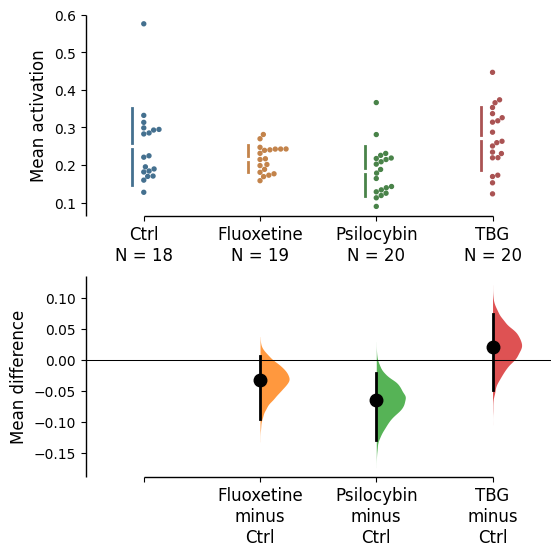

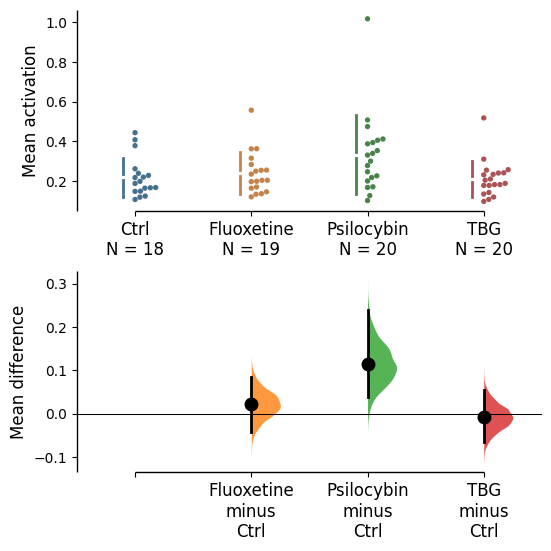

In [7]:
#create dictionary to store statistic results of each ICA
results = {}

#Create a loop to iterate over all ICA_columns in Data
for y in range(18):
    
    #create a looped y-input for dabest.load function
    experiment_column = f'ICA{y + 1}'
    
    # Load the data of first ICA into dabest
    dabest_obj = dabest.load(data=data.iloc[:,[0,(1+y)]], x="Group_name", y=experiment_column, idx=('Ctrl','Fluoxetine','Psilocybin','TBG')) 

    # Plot the data of the first ICA
    # Add swarm_label="Mean activation" to change y-label
    dabest_obj.mean_diff.plot(raw_marker_size=2,
                              swarm_label="Mean activation"); # *If you want to check for batch effects, add 'color_col="Batch" as argument
    
    #store stat results in dictionary
    results[f'ICA{y + 1}'] = dabest_obj.mean_diff.results

In [8]:
for x in range(18):
    results[f'ICA{x + 1}'].to_csv(f'/project/4180000.23/Fleur_GS/fsl_glm/ICA/ICA_{x+1}_stats.csv')

In [ ]:
ICA2_data = dabest.load(data=data.iloc[:,[0,1,2,(4)]], x="Group", y= 'ICA_2',
                      idx=("Control", "Fluoxetine", "TBG"))

ICA2_data.mean_diff.plot(raw_marker_size=5,
                          swarm_label="Mean activation");

ICA2_results = ICA2_data.mean_diff.results
ICA2_data.mean_diff